# ФРУКТЫ

In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch.utils.data import Subset
import torchvision.models as models
from sklearn.model_selection import train_test_split
import shutil

/home/gladiator3000/Project/11/fruit_animal_paradise/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("sshikamaru/fruit-recognition")

# print("Path to dataset files:", path)

# root_dir = '/home/gladiator3000/.cache/kagglehub/datasets/sshikamaru/fruit-recognition/versions/2/train/train'
# test_path = '/home/gladiator3000/.cache/kagglehub/datasets/sshikamaru/fruit-recognition/versions/2/test'

path1 = '/home/gladiator3000/Project/11/data/train'
path2 = '/home/gladiator3000/Project/11/data/val'

In [3]:
trnsfrms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

In [4]:
# full_dataset = torchvision.datasets.ImageFolder(f'{path}/train/train', transform=trnsfrms)

# train_size = int(0.7 * len(full_dataset)) 
# valid_size = len(full_dataset) - train_size  

# train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])




In [5]:
# data_dir = "/home/gladiator3000/.cache/kagglehub/datasets/sshikamaru/fruit-recognition/versions/2/train/train"
# train_dir = "data/train"
# val_dir = "data/val"

# def split_dataset():
#     if not os.path.exists(train_dir):
#         os.makedirs(train_dir)
#     if not os.path.exists(val_dir):
#         os.makedirs(val_dir)

#     for class_name in os.listdir(data_dir):
#         class_path = os.path.join(data_dir, class_name)
#         if not os.path.isdir(class_path):
#             continue 
#         images = os.listdir(os.path.join(data_dir, class_name))
#         train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

#         os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

#         for img in train_imgs:
#             src = os.path.join(data_dir, class_name, img)
#             dst = os.path.join(train_dir, class_name, img)
#             shutil.copyfile(src, dst)

#         for img in val_imgs:
#             src = os.path.join(data_dir, class_name, img)
#             dst = os.path.join(val_dir, class_name, img)
#             shutil.copyfile(src, dst)

# split_dataset()

In [6]:
import os
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt

device = torch.device("cuda")

base_dir = "/home/gladiator3000/.cache/kagglehub/datasets/sshikamaru/fruit-recognition/versions/2/train/train"
train_dir = 'data/train'
val_dir = 'data/val'

# Удалим train/ и val/, если уже есть
shutil.rmtree(train_dir, ignore_errors=True)
shutil.rmtree(val_dir, ignore_errors=True)

# Создадим заново
os.makedirs(train_dir)
os.makedirs(val_dir)

# Разделение на train/val
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir)
    os.makedirs(val_class_dir)

    for img in train_imgs:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copyfile(src, dst)

    for img in val_imgs:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_class_dir, img)
        shutil.copyfile(src, dst)

# Проверка
print("✅ Готово!")
print("📁 Классы в train:", os.listdir(train_dir))
for class_name in os.listdir(train_dir):
    count = len(os.listdir(os.path.join(train_dir, class_name)))
    print(f"  - {class_name}: {count} изображений в train")
for class_name in os.listdir(val_dir):
    count = len(os.listdir(os.path.join(val_dir, class_name)))
    print(f"  - {class_name}: {count} изображений в val")

✅ Готово!
📁 Классы в train: ['Apple Braeburn', 'Blueberry', 'Pepper Green', 'Corn', 'Cherry', 'Lemon', 'Kiwi', 'Tomato', 'Papaya', 'Pomegranate', 'Cactus fruit', 'Watermelon', 'Banana', 'Mango', 'Cantaloupe', 'Onion White', 'Orange', 'Passion Fruit', 'Apple Granny Smith', 'Peach', 'Pepper Red', 'Cucumber Ripe', 'Limes', 'Raspberry', 'Grape Blue', 'Pineapple', 'Plum', 'Pear', 'Strawberry', 'Apricot', 'Clementine', 'Avocado', 'Potato Red']
  - Apple Braeburn: 393 изображений в train
  - Blueberry: 369 изображений в train
  - Pepper Green: 355 изображений в train
  - Corn: 360 изображений в train
  - Cherry: 393 изображений в train
  - Lemon: 393 изображений в train
  - Kiwi: 372 изображений в train
  - Tomato: 590 изображений в train
  - Papaya: 393 изображений в train
  - Pomegranate: 393 изображений в train
  - Cactus fruit: 392 изображений в train
  - Watermelon: 380 изображений в train
  - Banana: 392 изображений в train
  - Mango: 392 изображений в train
  - Cantaloupe: 393 изображе

In [7]:
train_dataset = torchvision.datasets.ImageFolder('/home/gladiator3000/Project/11/data/train',
                                                 transform=trnsfrms)
valid_dataset = torchvision.datasets.ImageFolder('/home/gladiator3000/Project/11/data/val',
                                                 transform=trnsfrms)

In [8]:
print(train_dataset.classes)  
print(train_dataset.class_to_idx)  
print(len(train_dataset), len(valid_dataset))  

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
13471 3383


In [9]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=256)
valid_loader = DataLoader(valid_dataset, shuffle=True, batch_size=256)

In [11]:
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)  # Pretrained=True

In [12]:
test_batch = next(iter(train_loader))
test_b_s, test_b_l = test_batch
print(test_b_s.shape, test_b_l.shape)

torch.Size([256, 3, 224, 224]) torch.Size([256])


In [13]:
tu.get_model_summary(model.to(DEVICE), test_b_s.to(DEVICE))

Layer                                                     Kernel               Output           Params             FLOPs
0_features.0.Conv2d_0                                    [3, 32, 3, 3]   [256, 32, 112, 112]         864   2,774,532,096
1_features.0.BatchNorm2d_1                                        [32]   [256, 32, 112, 112]          64     411,041,792
2_features.0.SiLU_2                                                  -   [256, 32, 112, 112]           0               0
3_features.1.0.block.0.Conv2d_0                          [1, 32, 3, 3]   [256, 32, 112, 112]         288     924,844,032
4_features.1.0.block.0.BatchNorm2d_1                              [32]   [256, 32, 112, 112]          64     411,041,792
5_features.1.0.block.0.SiLU_2                                        -   [256, 32, 112, 112]           0               0
6_features.1.0.block.1.AdaptiveAvgPool2d_avgpool                     -       [256, 32, 1, 1]           0     102,768,640
7_features.1.0.block.1.Conv2d_fc

In [14]:
model.to(DEVICE)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [15]:
def fit_model(
        model: nn.Module,
        epochs: int,
        optimizer: torch.optim.Optimizer,
        criterion: torch.nn.modules.loss,
        history=None
    ):
    history = history or {
        'train_accs': [],
        'train_losses': [],
        'valid_accs': [],
        'valid_losses': [],
    }

    for epoch in range(1, epochs + 1):
        model.train()
        batch_losses = []
        batch_accs = []

        for samples, labels in train_loader:
            samples = samples.to(DEVICE)
            labels = labels.to(DEVICE)

            y_pred = model(samples)
            loss = criterion(y_pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(dim=1) == labels).float().mean().item())

        train_loss = np.mean(batch_losses)
        train_acc  = np.mean(batch_accs)
        history['train_losses'].append(train_loss)
        history['train_accs'].append(train_acc)

        model.eval()
        batch_losses = []
        batch_accs = []
        with torch.no_grad():
            for samples, labels in valid_loader:
                samples = samples.to(DEVICE)
                labels = labels.to(DEVICE)
                y_pred = model(samples)
                loss = criterion(y_pred, labels)
                batch_losses.append(loss.item())
                batch_accs.append((y_pred.argmax(dim=1) == labels).float().mean().item())

        valid_loss = np.mean(batch_losses)
        valid_acc  = np.mean(batch_accs)
        history['valid_losses'].append(valid_loss)
        history['valid_accs'].append(valid_acc)

        print(
            f"Epoch {epoch}/{epochs} | "
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
            f"Val Loss: {valid_loss:.4f}, Val Acc: {valid_acc:.4f}"
        )

    return history

In [16]:


model.classifier[1] = nn.Linear(1280, 33)

In [17]:
for param in model.parameters():
    param.requires_grad = False


In [18]:
# model.fc.weight.requires_grad = True
# model.fc.bias.requires_grad = True

model.classifier[1].weight.requires_grad = True
model.classifier[1].bias.requires_grad = True

In [19]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [20]:
model.classifier[1]

Linear(in_features=1280, out_features=33, bias=True)

In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [22]:
history = fit_model(model.to(DEVICE), optimizer=optimizer, criterion=criterion, epochs=5)

Epoch 1/5 | Train Loss: 1.2256, Train Acc: 0.8846 | Val Loss: 0.1951, Val Acc: 0.9934
Epoch 2/5 | Train Loss: 0.1633, Train Acc: 0.9948 | Val Loss: 0.0595, Val Acc: 0.9992
Epoch 3/5 | Train Loss: 0.0805, Train Acc: 0.9982 | Val Loss: 0.0317, Val Acc: 1.0000
Epoch 4/5 | Train Loss: 0.0526, Train Acc: 0.9989 | Val Loss: 0.0200, Val Acc: 1.0000
Epoch 5/5 | Train Loss: 0.0402, Train Acc: 0.9987 | Val Loss: 0.0152, Val Acc: 1.0000


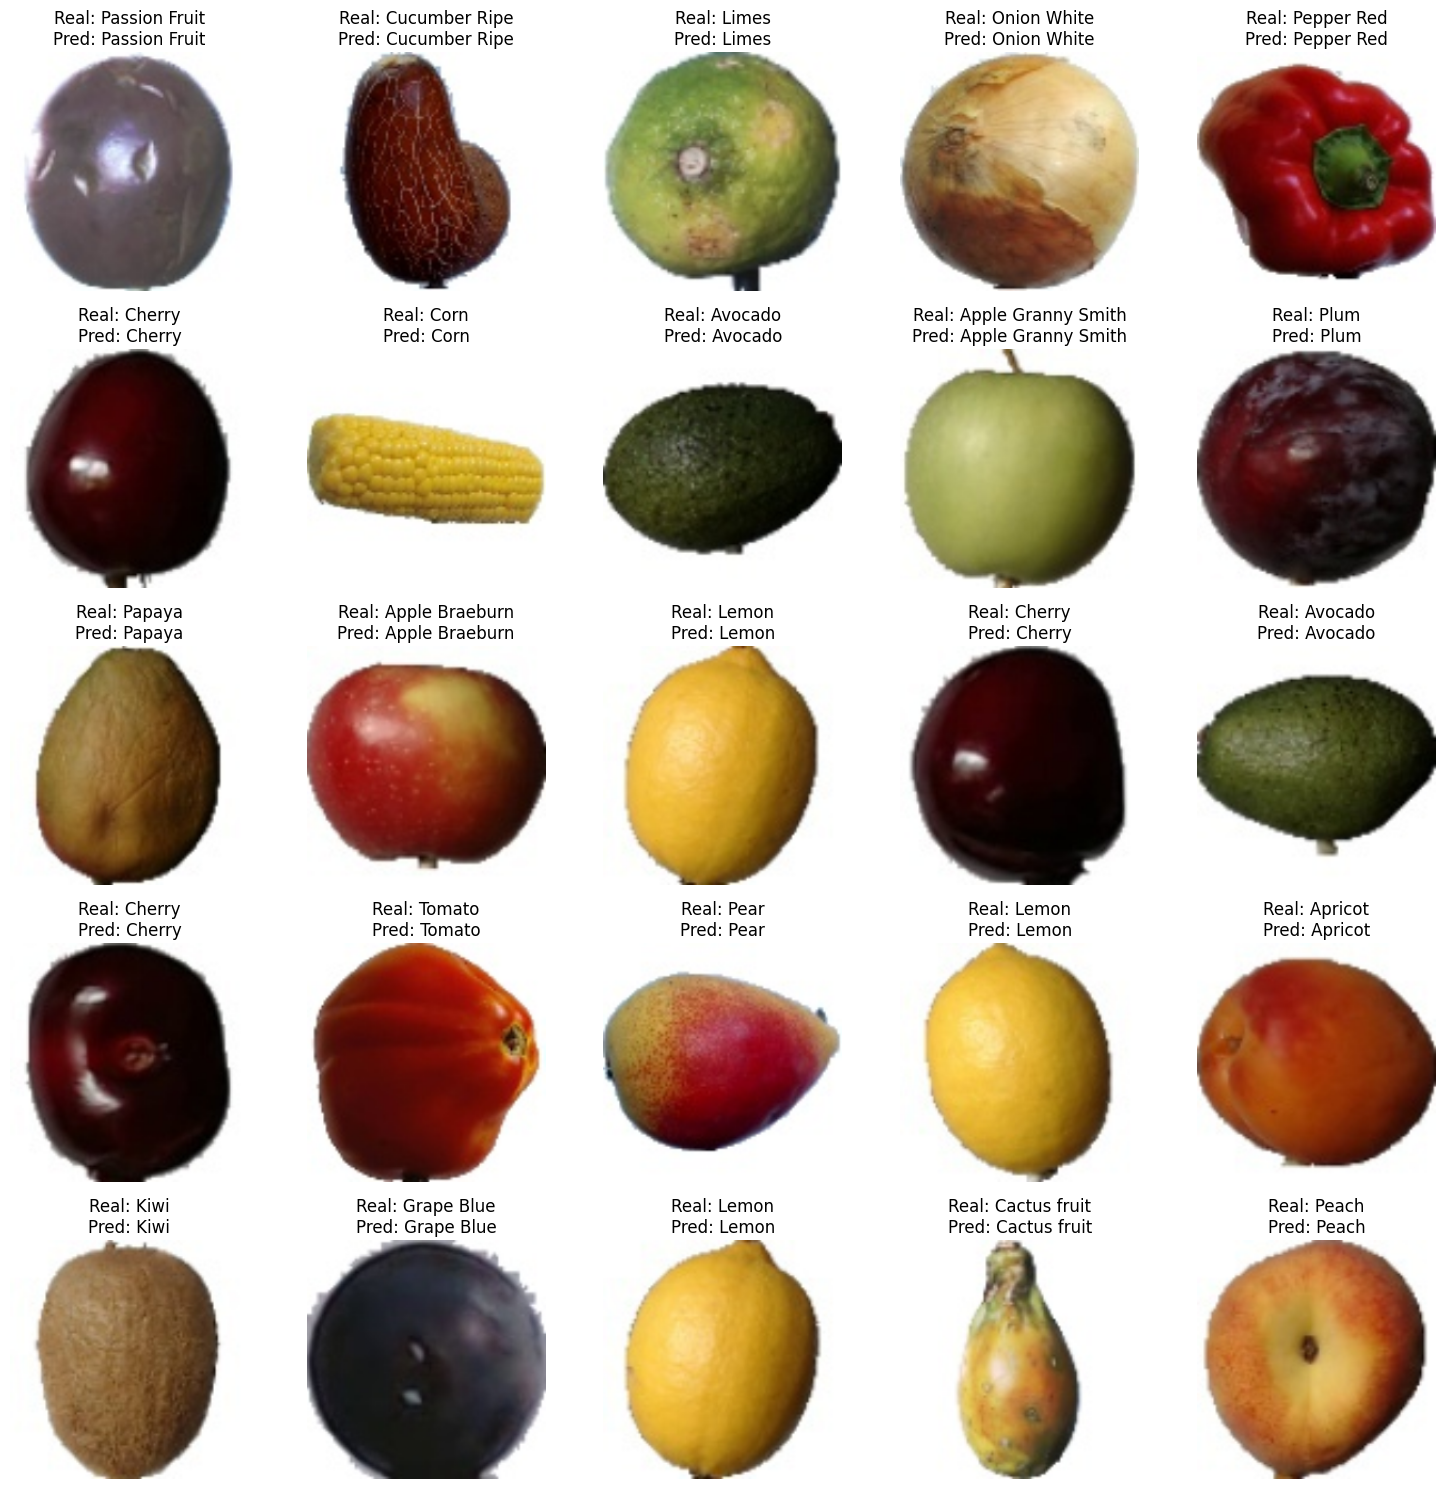

In [23]:
grid_size = 5
num_images = grid_size * grid_size

# Get class mappings
classes = {value: key for key, value in valid_dataset.class_to_idx.items()}

fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    n = np.random.randint(len(valid_dataset))  # Random index
    img = valid_dataset[n][0].permute(1, 2, 0).numpy()
    pred = model(valid_dataset[n][0].to(DEVICE).unsqueeze(0))
    predicted_class = classes[torch.argmax(pred, dim=1).item()]
    real_class = classes[valid_dataset.targets[n]]

    ax.imshow(img)
    ax.set_title(f'Real: {real_class}\nPred: {predicted_class}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

# classes = {v: k for k, v in full_dataset.class_to_idx.items()}  
# grid_size = 5  
# num_images = grid_size * grid_size
# fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# for i, ax in enumerate(axes.flat):
#     n = np.random.randint(len(valid_dataset))
#     img = valid_dataset[n][0] 
#     label = valid_dataset[n][1]  
#     img_np = img.permute(1, 2, 0).numpy() 
    
#     model.eval() 
#     with torch.no_grad():
#         pred = model(img.to(DEVICE).unsqueeze(0)) 
#         predicted_class_idx = torch.argmax(pred, dim=1).item()  
#     real_class = classes[label] 
#     predicted_class = classes[predicted_class_idx]  

#     ax.imshow(img_np)
#     ax.set_title(f'Real: {real_class}\nPred: {predicted_class}', fontsize=10)
#     ax.axis('off') 

# plt.tight_layout()
# plt.show()

In [26]:
# model_path = "model_fruit.pt"
# torch.save(model.state_dict(), model_path)
torch.save(model, "model_new_fruit.pt")